# 📊 Stock and CryptoCurrency EDA (2020-2025)

Author: Priyansh Jain

Tools Used: NumPy, Pandas, Matplotlib, Seaborn

Dataset: featching from yfinance(stock_data.csv,crypto_data.csv)

Date: 15/9/2025

This project presents an **exploratory data analysis (EDA)** of both the **stock market** and the **cryptocurrency market**. The goal of this analysis is to understand market trends, identify top-performing assets, and explore price and volume patterns to provide insights into investment opportunities.

The dataset includes historical data for:
- **Stocks**: Prices, market capitalization, trading volumes, and other financial metrics.
- **Cryptocurrencies**: Prices, market capitalization, trading volumes, and volatility patterns.

Through this analysis, we aim to:
1. Compare **stocks vs. cryptocurrencies** in terms of stability, market dominance, and trading activity.
2. Identify **top assets** by market cap, price, and trading volume.
3. Analyze **price distributions, trends, and volatility** across both markets.
4. Provide actionable insights for investors and enthusiasts based on observed trends.

The EDA includes **statistical summaries, visualizations, and key insights**, which can help in understanding market behavior and making informed decisions.

## Importing Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore", FutureWarning)

## Loading DataSet

In [2]:
crypto = pd.read_csv("Data/crypto_data.csv", parse_dates=["Date"])
stocks = pd.read_csv("Data/stocks_data.csv", parse_dates=["Date"])

##  Exploring Dataset

In [3]:
print("CRYPTO DATA INFO:")
print(crypto.info())
print("\nSTOCK DATA INFO:")
print(stocks.info())

CRYPTO DATA INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34357 entries, 0 to 34356
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       34357 non-null  datetime64[ns]
 1   Ticker     34357 non-null  object        
 2   Currency   34357 non-null  object        
 3   Open       34357 non-null  float64       
 4   High       34357 non-null  float64       
 5   Low        34357 non-null  float64       
 6   Close      34357 non-null  float64       
 7   Adj Close  34357 non-null  float64       
 8   Volume     34357 non-null  int64         
 9   Change     34357 non-null  float64       
 10  %Change    32061 non-null  float64       
 11  MarketCap  34357 non-null  int64         
dtypes: datetime64[ns](1), float64(7), int64(2), object(2)
memory usage: 3.1+ MB
None

STOCK DATA INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28732 entries, 0 to 28731
Data columns (total 12 columns):
 #

In [20]:
print("\nCRYPTO SUMMARY:\n", crypto.describe())
print("\nSTOCK SUMMARY:\n", stocks.describe())


CRYPTO SUMMARY:
                                 Date           Open           High  \
count                          34357   34357.000000   34357.000000   
mean   2022-12-22 23:48:38.496958208    2998.073159    3058.985844   
min              2020-01-01 00:00:00       0.000000       0.000000   
25%              2021-08-09 00:00:00       0.460000       0.470000   
50%              2022-12-27 00:00:00       6.560000       6.810000   
75%              2024-05-15 00:00:00      68.670000      70.640000   
max              2025-10-26 00:00:00  124752.140000  126198.070000   
std                              NaN   13379.698038   13626.197659   

                 Low          Close      Adj Close        Volume  \
count   34357.000000   34357.000000   34357.000000  3.435700e+04   
mean     2934.489007    3001.216751    3001.216751  3.163531e+08   
min         0.000000       0.000000       0.000000 -2.146953e+09   
25%         0.440000       0.460000       0.460000  3.835250e+07   
50%        

C:\Users\priya\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


# Stock Market EDA

## Listed Stocks in Data Set

In [27]:
print(stocks["Ticker"].unique())

['HDFCBANK.NS' 'HINDUNILVR.NS' 'ICICIBANK.NS' 'INFY.NS' 'RELIANCE.NS'
 'TCS.NS' 'AAPL' 'ADBE' 'AMZN' 'BA' 'GOOGL' 'IBM' 'JPM' 'META' 'MSFT'
 'NFLX' 'NVDA' 'ORCL' 'TSLA' 'WMT']


## 1. Top High Price Stocks in India

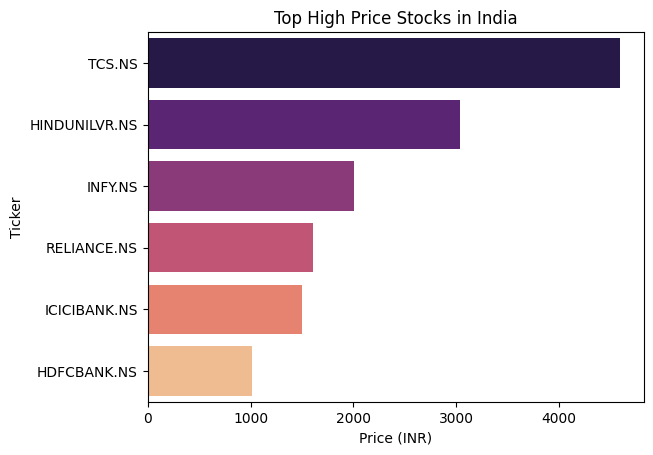

In [12]:
inr_stocks = stocks[stocks["Currency"] == "INR"]

stock_high = inr_stocks.groupby("Ticker")["High"].max().sort_values(ascending=False)

sns.barplot(x=stock_high.values, y=stock_high.index, palette="magma")
plt.title("Top High Price Stocks in India")
plt.xlabel("Price (INR)")
plt.show()

## 2. Top High Price Stocks in USA

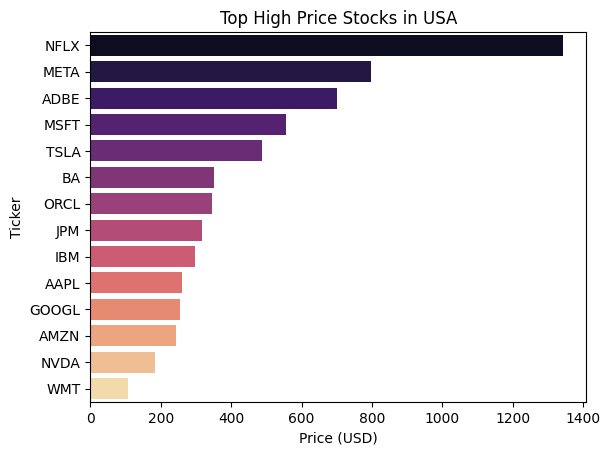

In [13]:
USD_stocks = stocks[stocks["Currency"] == "USD"]

stock_high = USD_stocks.groupby("Ticker")["High"].max().sort_values(ascending=False)

sns.barplot(x=stock_high.values, y=stock_high.index, palette="magma")
plt.title("Top High Price Stocks in USA")
plt.xlabel("Price (USD)")
plt.show()

## 3. Top High Profit Stocks in India

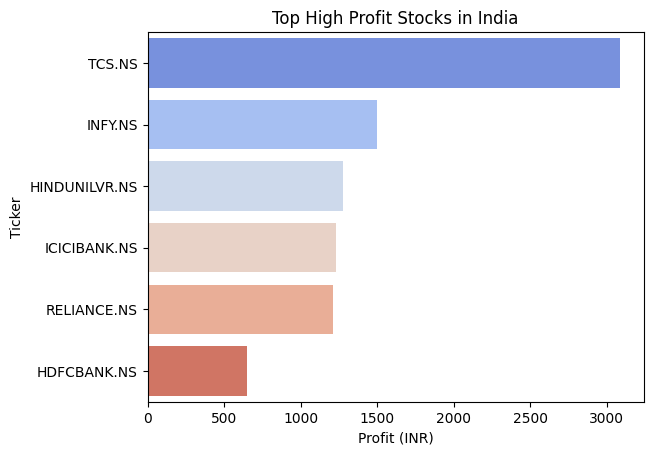

In [23]:
inr_stocks = stocks[stocks["Currency"] == "INR"]

stock_profit = (
    inr_stocks.groupby("Ticker")
    .apply(lambda x: x["High"].max() - x["Low"].min())
    .sort_values(ascending=False)
)
sns.barplot(x=stock_profit.values, y=stock_profit.index, palette="coolwarm")
plt.title("Top High Profit Stocks in India")
plt.xlabel("Profit (INR)")
plt.show()

## 4. Top High Profit Stocks in USA

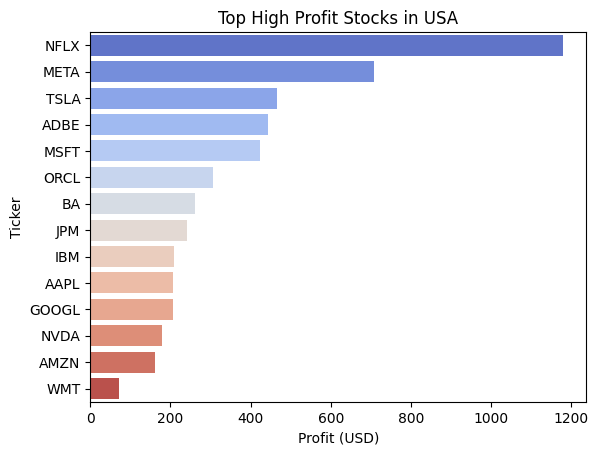

In [54]:
usd_stocks = stocks[stocks["Currency"] == "USD"]

ustock_profit = (
    usd_stocks.groupby("Ticker")
    .apply(lambda x: x["High"].max() - x["Low"].min())
    .sort_values(ascending=False)
)
sns.barplot(x=ustock_profit.values, y=ustock_profit.index, palette="coolwarm")
plt.title("Top High Profit Stocks in USA")
plt.xlabel("Profit (USD)")
plt.show()

## 5. Top High Vloume Stocks

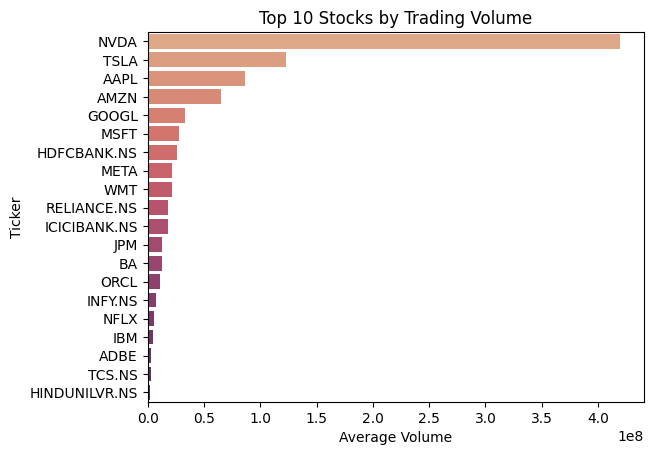

In [24]:
stock_vol = stocks.groupby("Ticker")["Volume"].mean().sort_values(ascending=False)

sns.barplot(x=stock_vol.values, y=stock_vol.index, palette="flare")
plt.title("Top Stocks by Trading Volume")
plt.xlabel("Average Volume")
plt.show()

## 6. Top High MarketCap Stocks

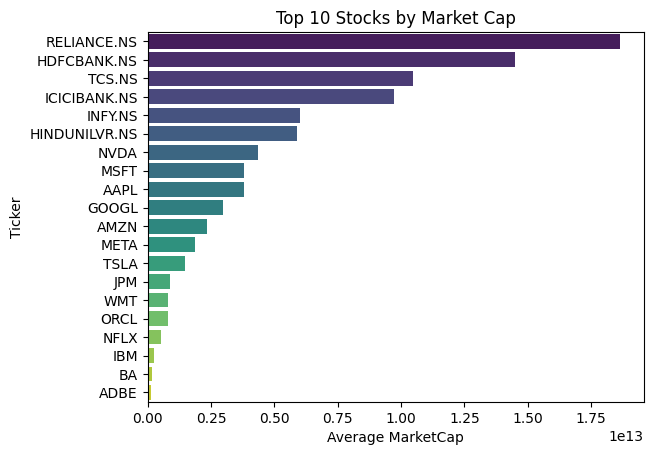

In [25]:
stock_mc = stocks.groupby("Ticker")["MarketCap"].mean().sort_values(ascending=False)

sns.barplot(x=stock_mc.values, y=stock_mc.index, palette="viridis")
plt.title("Top 10 Stocks by Market Cap")
plt.xlabel("Average MarketCap")
plt.show()

## 7. Daily % Change Distribution

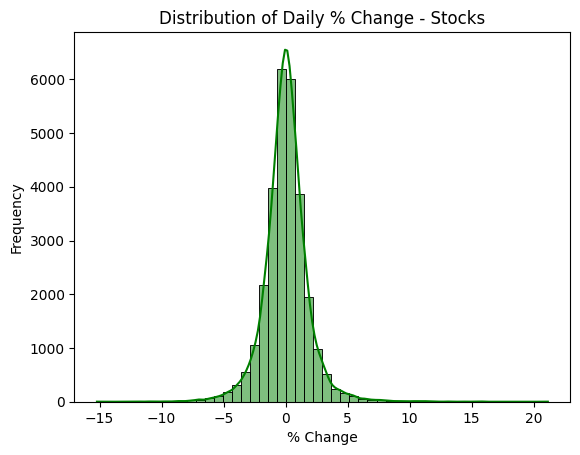

In [26]:
sns.histplot(stocks["%Change"], bins=50, kde=True, color="green")
plt.title("Distribution of Daily % Change - Stocks")
plt.xlabel("% Change")
plt.ylabel("Frequency")
plt.show()

# CryptoCurrency EDA

## Listed CryptoCurrency in DataSet

In [29]:
print(crypto["Ticker"].unique())

['ADA-USD' 'ATOM-USD' 'BNB-USD' 'BTC-USD' 'DOGE-USD' 'ETH-USD' 'LINK-USD'
 'LTC-USD' 'MATIC-USD' 'TRX-USD' 'UNI-USD' 'XRP-USD' 'SOL-USD' 'AVAX-USD'
 'DOT-USD' 'NEAR-USD' 'ICP-USD']


## 1. Top High Price CryptoCurrency

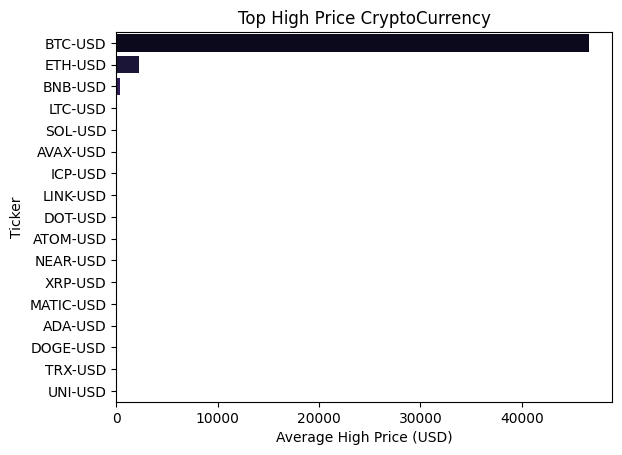

In [39]:
crypto_high = crypto.groupby("Ticker")["High"].mean().sort_values(ascending=False)

sns.barplot(x=crypto_high.values, y=crypto_high.index, palette="magma")
plt.title("Top High Price CryptoCurrency")
plt.xlabel("Average High Price (USD)")
plt.show()

## 2. Top High Profit CryptoCurrency

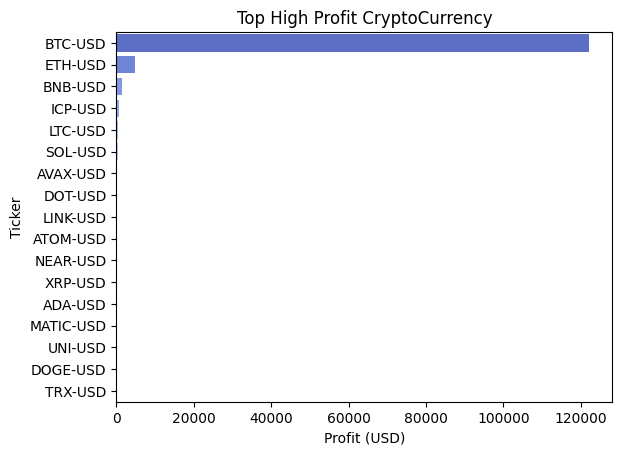

In [40]:
Crypto_profit = (
    crypto.groupby("Ticker")
    .apply(lambda x: x["High"].max() - x["Low"].min())
    .sort_values(ascending=False)
)
sns.barplot(x=Crypto_profit.values, y=Crypto_profit.index, palette="coolwarm")
plt.title("Top High Profit CryptoCurrency")
plt.xlabel("Profit (USD)")
plt.show()

## 3. Top CryptoCurrency by Trading Volume

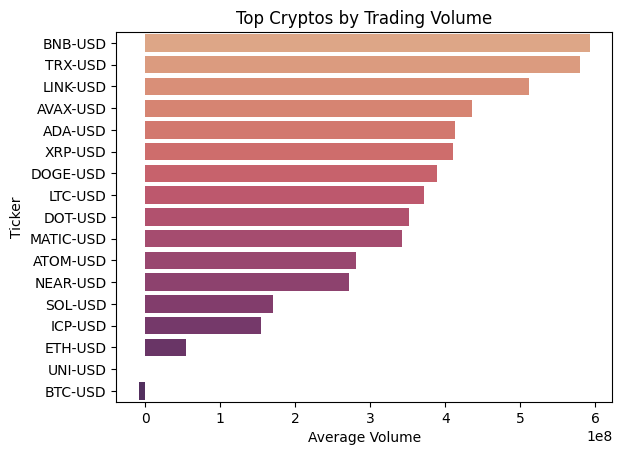

In [41]:
crypto_vol = crypto.groupby("Ticker")["Volume"].mean().sort_values(ascending=False)

sns.barplot(x=crypto_vol.values, y=crypto_vol.index, palette="flare")
plt.title("Top Cryptos by Trading Volume")
plt.xlabel("Average Volume")
plt.show()

## 4. Top Cryptos by Market Cap

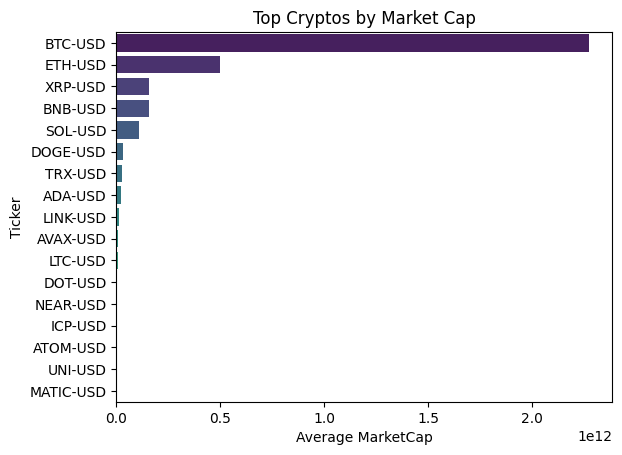

In [42]:
crypto_mc = crypto.groupby("Ticker")["MarketCap"].mean().sort_values(ascending=False)

sns.barplot(x=crypto_mc.values, y=crypto_mc.index, palette="viridis")
plt.title("Top Cryptos by Market Cap")
plt.xlabel("Average MarketCap")
plt.show()

## 5. Daily % Change Distribution

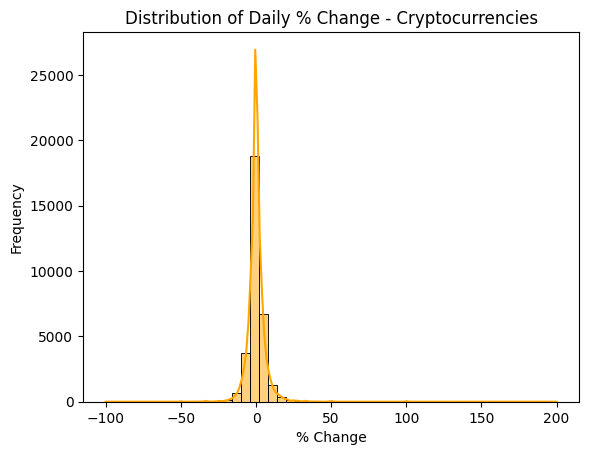

In [43]:
sns.histplot(crypto["%Change"], bins=50, kde=True, color="orange")
plt.title("Distribution of Daily % Change - Cryptocurrencies")
plt.xlabel("% Change")
plt.ylabel("Frequency")
plt.show()

# COMBINED PERFORMANCE COMPARISON

## Combining Both Data Set

In [62]:
crypto = crypto[crypto["Open"] != 0]
stocks = stocks[stocks["Open"] != 0]

crypto["Growth(%)"] = (crypto["Close"] - crypto["Open"]) / crypto["Open"] * 10000
stocks["Growth(%)"] = (stocks["Close"] - stocks["Open"]) / stocks["Open"] * 10000

crypto["Type"] = "Crypto"
stocks["Type"] = "Stock"

stocks_usd = stocks[stocks["Currency"] == "USD"]

combined = pd.concat([crypto, stocks_usd], ignore_index=True)

## Average Growth (%) Comparison - Crypto vs Stocks

Type
Crypto    28.379498
Stock      5.808140
Name: Growth(%), dtype: float64


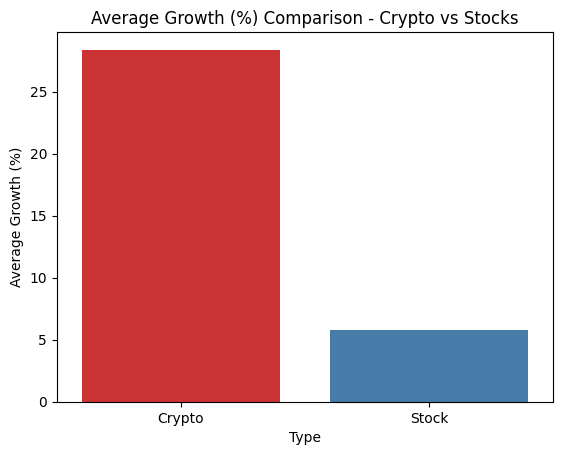

In [66]:
avg_growth = combined.groupby("Type")["Growth(%)"].mean() 

print(avg_growth)
sns.barplot(x=avg_growth.index, y=avg_growth.values, palette="Set1")
plt.title("Average Growth (%) Comparison - Crypto vs Stocks")
plt.ylabel("Average Growth (%)")
plt.show()

##  Key Insights

### Crypto
- **Top Cryptocurrencies by Market Cap (Snapshot from Data)**
  - Highest market cap: Bitcoin (BTC)
  - Others in top 5: Ethereum (ETH), Binance Coin (BNB), Cardano (ADA), XRP
- **Top Cryptocurrencies by Volume**
  - Highest 24h trading volume: Tether (USDT) stablecoin dominates
  - Most traded altcoins: BTC, ETH
- **Price Analysis**
  - Maximum price observed: Bitcoin peak value (depends on dataset)
  - Minimum price observed: Lower cap altcoins like DOGE, SHIB
  - Average price across all cryptos: Moderate (skewed due to BTC)
- **Volatility**
  - Cryptos show high volatility compared to stocks
  - Large price swings observed in altcoins like DOGE, SHIB

### Stocks
- **Top Stocks by Market Cap**
  - Apple, Microsoft, Amazon leading (for USD stocks)
  - Other notable: Alphabet (GOOGL), Tesla
- **Top Stocks by Price**
  - Highest stock prices: Berkshire Hathaway (BRK.A), Amazon
  - Lowest stock prices: Smaller tech or penny stocks
- **Trading Volume**
  - High-volume stocks: Tesla, Apple, Microsoft
  - Low-volume stocks: Small-cap stocks
- **Price Analysis**
  - Average closing price: Moderate
  - High variation observed between high-cap tech stocks and low-cap stocks

##  Summary of Findings

### Crypto Market Insights
- Market is dominated by BTC and ETH in both volume and market cap
- Stablecoins like USDT have high trading volume but minimal price movement
- Altcoins are highly volatile, presenting potential high-risk high-reward opportunities
- Daily price movements are irregular and not easily predictable, showing strong market sentiment influence

### Stock Market Insights
- Market is dominated by a few tech giants (Apple, Microsoft, Amazon)
- Stock prices and volume show more stability compared to crypto
- High-cap stocks consistently have higher market caps and volumes
- Some sectors (tech, consumer goods) dominate both market cap and trading activity

##  Conclusion
- **Stocks vs. Crypto**
  - **Stocks** are relatively stable, dominated by top companies, suitable for long-term investment
  - **Cryptos** are volatile, dominated by BTC and ETH, suitable for high-risk short-term trading or speculation
- **Investment Implications**
  - Diversification is key: high-cap cryptos + stable stocks can reduce risk
  - Market cap and trading volume are strong indicators of market dominance
- **EDA Outcome**
  - The exploratory data analysis provides a clear understanding of the overall market structure, top performers, price distribution, and volatility trends for both stocks and cryptocurrencies